# PreProcessing: Feature Selection

Feature Selection is an important step in data pre-processing. It consists in selecting the best subset of input variable as the most pertinent. Discarding irrelevant data is essential before applying Machine Learning algorithm in order to:
* *Reduce Overfitting*: less opportunity to make decisions based on noise;
* *Improve Accuracy*: less misleading data means modelling accuracy improves. Predictions can be greatly distorted by redundant attributes. 
* *Reduce Training Time*: With less data the algorithms will train faster;




### Data import
Data are imported from .csv file, splitted in **train_set** and **test_set** which are used by supervised algorithm. Otherwise with unsupervised algorithm the entire dataset will be processed. 

In [1]:
from sklearn.model_selection import train_test_split
from mypackage import methods as m
import pandas as pd



data = pd.read_csv('table.csv')

labels =  ['pop', 'dusaf', 'rete_fer', 'autostrad' , 'strade_pri', 'h_mean']
langs = ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5']

temp= ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']
X  = pd.DataFrame(data, columns = labels)
X1 = pd.DataFrame(data, columns = langs)
Y = pd.DataFrame(data, columns= ['mov_tot']) #'mov_tot' - 'FBpop_tot'
Y = Y.values.ravel()
X_stand = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

lat = pd.DataFrame(data, columns= ['lat'])
lat = lat['lat'].tolist()

lon = pd.DataFrame(data, columns= ['lon'])
lon = lon['lon'].tolist()


coords = list(zip(lat, lon))

Due to the fact there isn’t a best feature selection technique, many different methods are performed. The aim of this part is to discover by experimentation which one/ones work better for this specific problem. 
In this study, I choose supervised methods, which are classified into 3 groups, based on their  different approach.


## Filter Methods
Filter-based feature selection methods adopt statistical measures to evaluate the correlation/dependence between input variables.
These select features from the without machine learning algorithm. In terms of computation, they are very fast and are very suitable in order to remove duplicated, correlated, redundant variables. On the contrary,  these methods do not remove multicollinearity. 


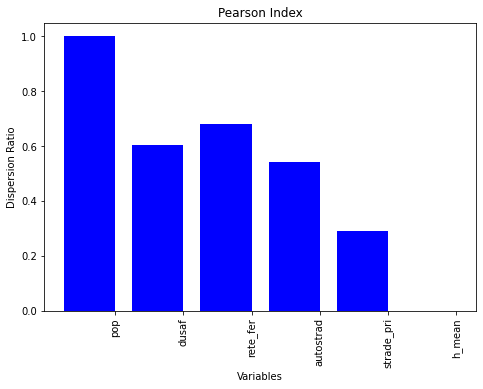

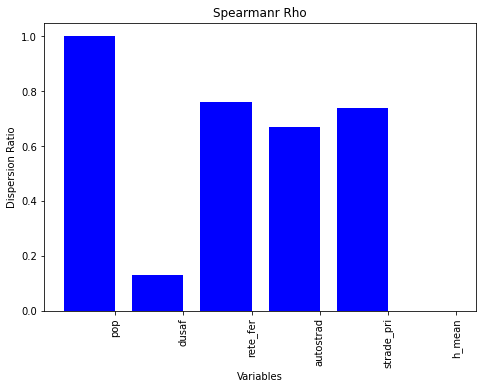

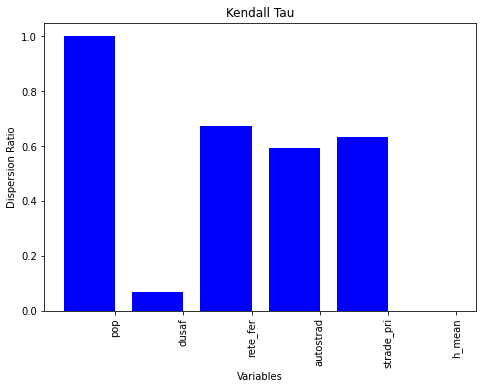

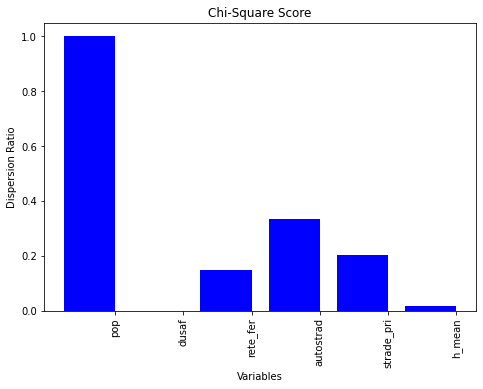

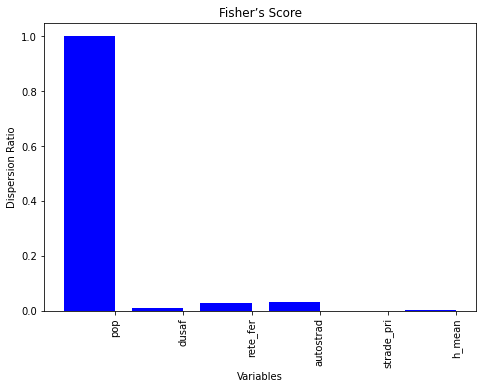

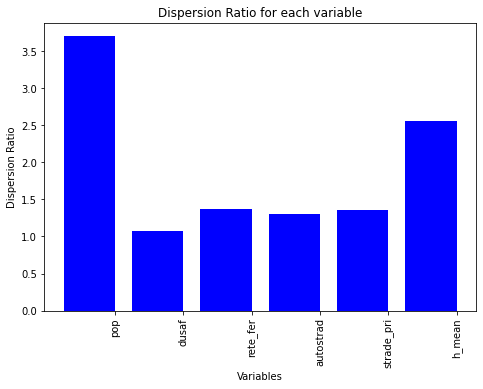

pop :  3.696779482494393
dusaf :  1.0777593900319926
rete_fer :  1.3740042429602914
autostrad :  1.2981032292376529
strade_pri :  1.3522066189992477
h_mean :  2.5542761802424105


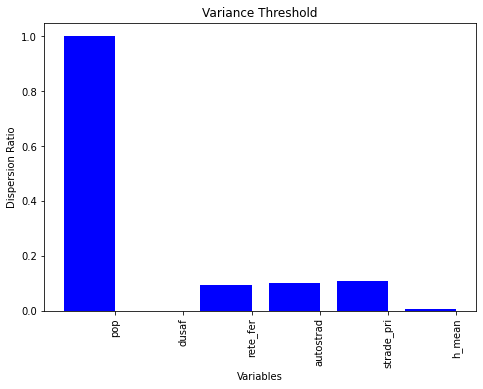

In [2]:
#Pearson correlation index


In [ ]:
m.pearson(X, Y, labels)

### Spearmanr correlation


In [ ]:
m.spearmanr(X, Y, labels)

### Kendall tau

In [ ]:
m.kendall(X, Y, labels)


### (Chi-square test not allowed with no categorical input)

In [ ]:
m.chi2_test(X_train, y_train, X_test, labels)

### F-Test

In [ ]:
m.f_test(X_train, y_train, X_test, labels)

### Dispersion Ratio (Unsupervised)

In [ ]:
m.compute_dispersion_ratio(X, labels)

### Variance Threshold (Unsupervised)

In [ ]:
m.variance_threshold(X, labels)

## Wrapper Methods (and Embedded)
Wrapper methods, as the name suggests, wrap a machine learning model, with different subsets of input features: In this way the subsets are  evaluated following  the best model performance.
Embedded methods instead are characterised by the benefits of both the wrapper and filter methods, by including interactions of features but also having a reasonable computational cost.


Features: 22/22

Best accuracy score: 0.93
Best subset (indices): (0, 2, 3, 4)
Best subset (corresponding names):
pop
rete_fer
autostrad
strade_pri
pop :  1.00000
dusaf :  0.00000
rete_fer :  0.01389
autostrad :  0.01172
strade_pri :  0.01296
h_mean :  0.01281


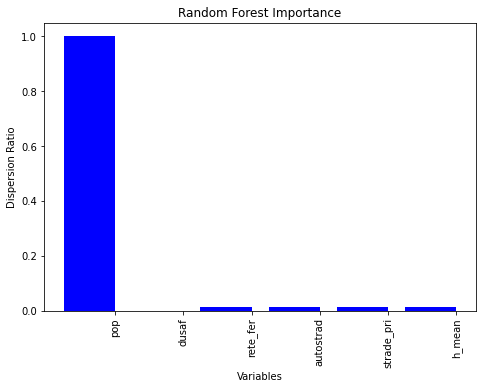

/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/sklearn/model_selection/_split.py:67

Traceback (most recent call last):
  File "/Users/Brescia/opt/anaconda3/envs/notebooks/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/zm/5fkjvb8s35b6fv30t5jrmgx00000gn/T/ipykernel_8317/3404091851.py", line 8, in <module>
    m.detect_n_feature_RFE(X, Y.astype(int))
  File "/Users/Brescia/Desktop/D-DUST/notebooks/mypackage/methods.py", line 175, in detect_n_feature_RFE
    print('Accuracy: %.3f (%.3f)' % (statistics.mean(n_scores), std(n_scores)))
  File "/Users/Brescia/Desktop/D-DUST/notebooks/mypackage/methods.py", line 175, in detect_n_feature_RFE
    print('Accuracy: %.3f (%.3f)' % (statistics.mean(n_scores), std(n_scores)))
  File "_pydevd_bundle/pydevd_cython_darwin_39_64.pyx", line 1179, in _pydevd_bundle.pydevd_cython_darwin_39_64.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython_darwin_39_64.pyx", line 620, in _pydevd_bundle.pydevd_cython_darwin_39_64.Py

TypeError: object of type 'NoneType' has no len()

In [2]:
#exhaustive mlxetend


In [ ]:
m.exhaustive_feature_selection(X_train, y_train, labels)

In [ ]:
#Random Forest importance

In [ ]:
m.RF_importance(X_train, y_train, labels)

## Multiscale Geographically Weighted Regression
Due to the fact that this study is related to geographic and spatial data, each pieces of data is very sensitive to the geographic distance between them. So the use of mgwr methods could be innovative, since multivariate models are increasingly encountered in geographical research to estimate spatially varying relationships between a targets and its predictive variables.




In [ ]:
m.mgwr(data, langs)
